# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [73]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [42]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [43]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [44]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Gre has a bigger range 220-800 compared to GPA 2.26-4 therefore STD value will be larger as well

#### Question 4. Drop data points with missing data


In [45]:
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [46]:
df_raw.dropna(axis=0, how='any', inplace=True)
df_raw.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [47]:
print df_raw.isnull().sum()
print df_raw.count()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64
admit       397
gre         397
gpa         397
prestige    397
dtype: int64


Answer: Using df_raw.isnull().sum() command should return zeros for all of the columns and df_raw.count() should return same number of data points for each column

#### Question 6. Create box plots for GRE and GPA

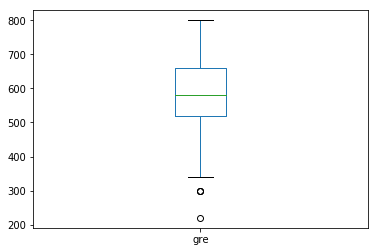

In [27]:
#boxplot 1
df_raw['gre'].plot(kind='box')

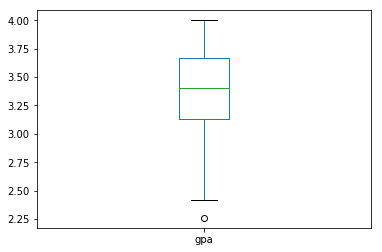

In [28]:
#boxplot 2 
df_raw['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: There are 2 outliers for gre and one outlier for gpa. gpa data looks to be more skewed than the gre

#### Question 8. Describe each distribution 

Axes(0.125,0.125;0.775x0.755)


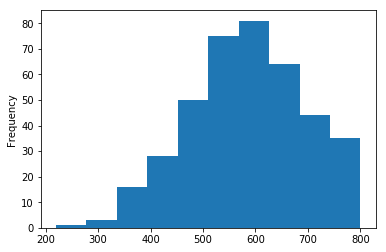

In [35]:
# plot the distribution of each variable 
print df_raw['gre'].plot(kind='hist')

Axes(0.125,0.125;0.775x0.755)


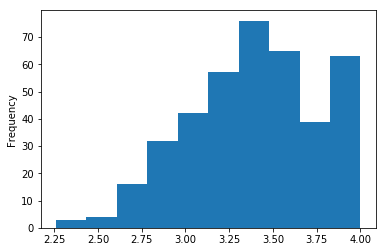

In [36]:
print df_raw['gpa'].plot(kind='hist')

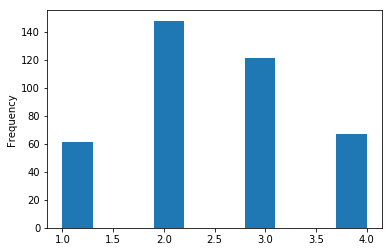

In [37]:
df_raw['prestige'].plot(kind='hist')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No all of the distributions look to be skewed

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes since most of models work with assumptions of normality our model would be more accurate to apply data transformation to achieve normality 

#### Question 11. Which of our variables are potentially colinear? 

In [39]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


gre and gpa are potentially colinear

#### Question 12. What did you find?

Answer: There is fairly a low colinearity bewtween the variables, the two variables with the highest correlation are gre and gpa.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

- Create a summary table to underestand the variables statstical values
- Explore missing values and either replace them with a mean value or replace them completely
- Explore outlier and remove them if neccessary
- Add dummy variables for prestige field
- Check for normality distribution
- Create a correlation matrix to test for colinearity between the variables
- Remove one of the colinear variables
- Check to see if there is linear relationship between the data points
- If no linear realtionship apply log transformation
- Run the linear regression model
- Evaluate the model by analyzing the R squared and p-values

#### Question 14. What is your hypothesis? 

Answer: Higher GRE, GPA and Prestige values will result in higher chance of acceptance to the school. Using GRE, GPA and Prestige data points we're able to accurately predict admission of the student to the school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [94]:
df_raw2.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

There are 2 null values for gre, 2 null values for gpa and 1 null value for prestige. We can replace the null values for gre and gpa with their mean and prestige with it's mode.

#### 2. Bonus: Log transform the skewed data

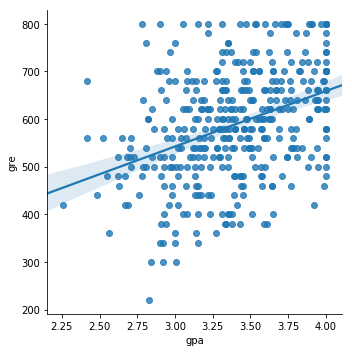

In [99]:
##print sns.lmplot('admit', 'gre', df_raw)
print sns.lmplot('gpa', 'gre', df_raw)
##print sns.lmplot('gpa', 'prestige', df_raw)

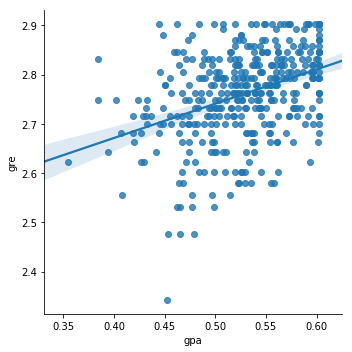

In [85]:
log_df_raw = df_raw.copy()
log_df_raw[['gpa', 'gre']] = log_df_raw[['gpa', 'gre']].apply(np.log10)
print sns.lmplot('gpa', 'gre', log_df_raw)

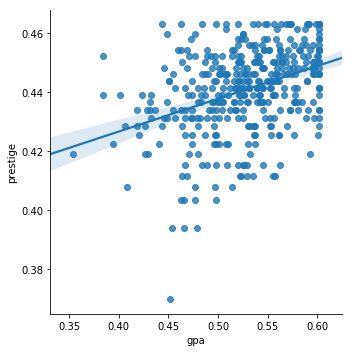

In [87]:
log_df_raw[['prestige']] = log_df_raw[['gre']].apply(np.log10)
print sns.lmplot('gpa', 'prestige', log_df_raw)

#### 3. Advanced: Impute missing data

In [93]:
#Read in data from source 
df_raw2 = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [89]:
df_raw2.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [95]:
df_raw2['gre'] = df_raw2['gre'].fillna(int(df_raw2['gre'].mean()))
df_raw2['gpa'] = df_raw2['gpa'].fillna(df_raw2['gpa'].mean())
df_raw2['prestige'] = df_raw2['prestige'].fillna(df_raw2['prestige'].mode())
#mode=df_raw2['prestige'].mode()
#df_raw2['prestige'] = dfa_raw2['prestige'].fillna(mode)
df_raw2.isnull().sum()
#df_raw2[df_raw2['prestige'].isnull()]

admit       0
gre         0
gpa         0
prestige    1
dtype: int64

In [106]:
df_raw2.prestige.fillna(value=df_raw2['prestige'].mode()[0]).isnull().sum()

0

In [105]:
df_raw2['prestige'].mode()

0    2.0
dtype: float64